In [1]:
import numpy as np
import pandas as pd
from sklearn.neural_network import BernoulliRBM
import matplotlib.pyplot as plt

## Import data

Using the sign language numbers dataset from Kaggle:
https://www.kaggle.com/ardamavi/sign-language-digits-dataset

In [2]:
sl = np.load('./Sign-language-digits-dataset 2/X.npy')

In [3]:
sl

array([[[0.46666667, 0.4745098 , 0.47843137, ..., 0.5176471 ,
         0.5137255 , 0.5019608 ],
        [0.49803922, 0.4862745 , 0.4862745 , ..., 0.5254902 ,
         0.5176471 , 0.50980395],
        [0.54509807, 0.49411765, 0.49019608, ..., 0.5294118 ,
         0.5254902 , 0.5137255 ],
        ...,
        [0.5019608 , 0.5137255 , 0.5176471 , ..., 0.5529412 ,
         0.54509807, 0.53333336],
        [0.49803922, 0.5058824 , 0.5137255 , ..., 0.54509807,
         0.53333336, 0.52156866],
        [0.49019608, 0.49803922, 0.5019608 , ..., 0.5294118 ,
         0.52156866, 0.50980395]],

       [[0.59607846, 0.60784316, 0.61960787, ..., 0.4627451 ,
         0.4509804 , 0.44313726],
        [0.60784316, 0.61960787, 0.6313726 , ..., 0.4745098 ,
         0.4627451 , 0.4509804 ],
        [0.6156863 , 0.627451  , 0.6431373 , ..., 0.4862745 ,
         0.4745098 , 0.4627451 ],
        ...,
        [0.50980395, 0.5176471 , 0.5254902 , ..., 0.40392157,
         0.39607844, 0.3882353 ],
        [0.5

In [4]:
sl.shape

(2062, 64, 64)

In [5]:
## So we have 2062 images, each size 64 x 64

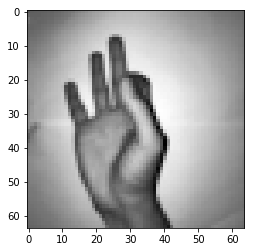

In [6]:
## Example image

plt.imshow(sl[0], cmap='binary_r')

In [7]:
sl[0].shape

(64, 64)

In [8]:
sl[0][22]

array([0.6392157 , 0.64705884, 0.6627451 , 0.6784314 , 0.6901961 ,
       0.7137255 , 0.7294118 , 0.74509805, 0.7607843 , 0.77254903,
       0.75686276, 0.4117647 , 0.36862746, 0.3882353 , 0.56078434,
       0.88235295, 0.8980392 , 0.9019608 , 0.8627451 , 0.46666667,
       0.45490196, 0.49019608, 0.45882353, 0.49019608, 0.7647059 ,
       0.4509804 , 0.4627451 , 0.6       , 0.7411765 , 0.7294118 ,
       0.5686275 , 0.3764706 , 0.32941177, 0.38431373, 0.3764706 ,
       0.39607844, 0.7176471 , 0.94509804, 0.9372549 , 0.92941177,
       0.92941177, 0.9254902 , 0.91764706, 0.9098039 , 0.8980392 ,
       0.8784314 , 0.8666667 , 0.85490197, 0.84313726, 0.827451  ,
       0.8156863 , 0.8039216 , 0.7882353 , 0.78039217, 0.76862746,
       0.7529412 , 0.73333335, 0.7176471 , 0.69803923, 0.68235296,
       0.6666667 , 0.654902  , 0.63529414, 0.61960787], dtype=float32)

## Use RBM for feature extraction

In [9]:
rbm = BernoulliRBM(random_state=22, verbose=1)

RBM is good for feature extraction for this dataset because the scikit-learn documentation says: 

<i>For greyscale image data where pixel values can be interpreted as degrees of blackness on a white background, like handwritten digit recognition, the Bernoulli Restricted Boltzmann machine model (BernoulliRBM) can perform effective non-linear feature extraction.</i>

These images are grayscale so fit this requirement.

In [10]:
## Reshape x data from 3D array to 2D array

sl_flatten = sl.reshape(sl.shape[0], sl.shape[1]*sl.shape[2])

In [11]:
sl_flatten.shape

(2062, 4096)

In [12]:
fit_rbm = rbm.fit(sl_flatten)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -3022.31, time = 6.65s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -2395.36, time = 9.89s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -2386.45, time = 9.97s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -2382.31, time = 8.62s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -2387.75, time = 9.15s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -2386.40, time = 9.25s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -2385.35, time = 8.81s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -2384.56, time = 8.55s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -2387.59, time = 9.05s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -2387.17, time = 8.84s


In [15]:
## Number of features extracted (down from 2,062, number of samples)

fit_rbm.n_components

256

In [16]:
## Sample of the components (this is a 256 x 4096 array)

fit_rbm.components_

array([[-0.40092465, -0.05585548, -0.38483435, ..., -0.37877883,
        -0.09806235, -0.42702759],
       [-0.38876193, -0.03618664, -0.38659628, ..., -0.39519589,
        -0.07383573, -0.41987665],
       [-0.39007026, -0.04491852, -0.40042922, ..., -0.40339956,
        -0.10495876, -0.42270443],
       ...,
       [-0.3854447 , -0.03814662, -0.41143047, ..., -0.36518271,
        -0.08490045, -0.42451123],
       [-0.39979073, -0.04064629, -0.39501622, ..., -0.37839201,
        -0.08114228, -0.43021783],
       [-0.38190727, -0.03302233, -0.39407663, ..., -0.38218088,
        -0.09326819, -0.41585489]])

In [17]:
fit_rbm.components_.shape

(256, 4096)

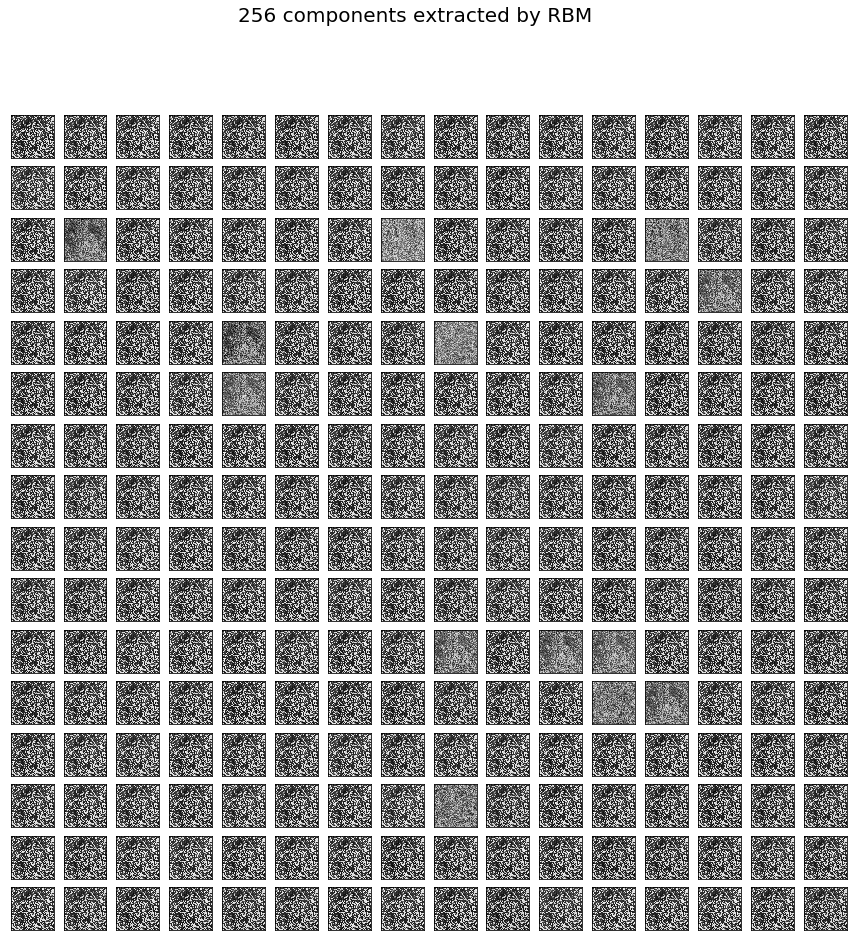

In [24]:
plt.figure(figsize=(15, 15))

for i, comp in enumerate(rbm.components_):
    plt.subplot(16, 16, i+1)
    plt.imshow(comp.reshape((64, 64)), cmap=plt.cm.binary_r,
              interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('256 components extracted by RBM', fontsize=20)
plt.show()

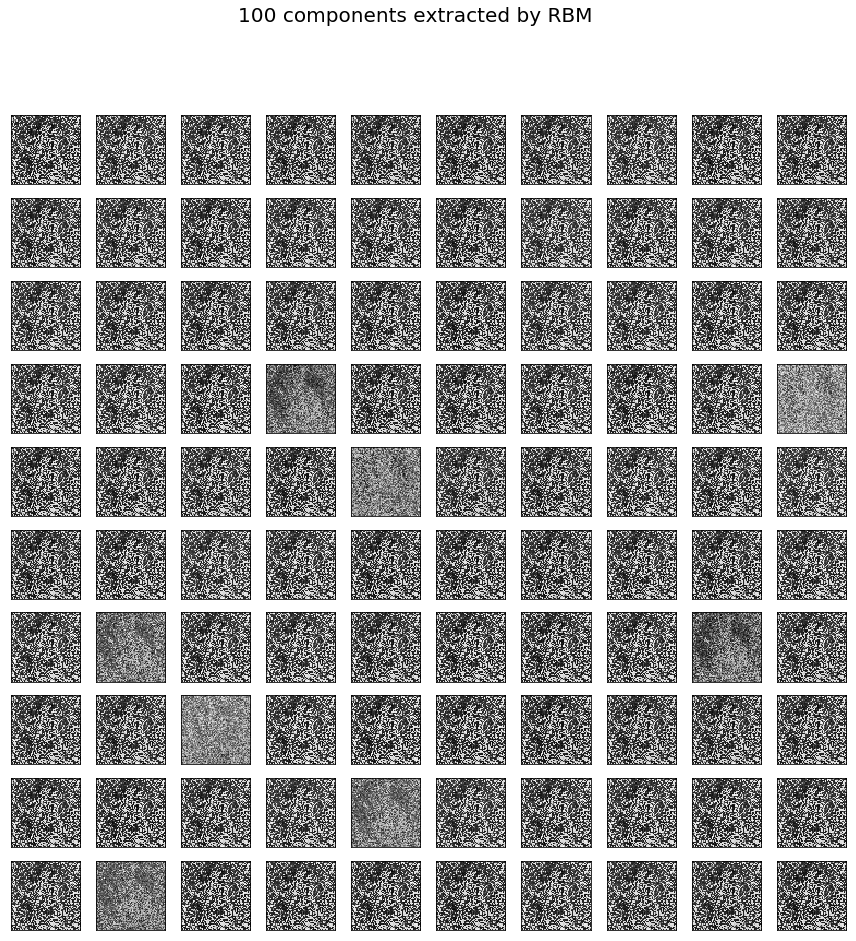

In [27]:
plt.figure(figsize=(15, 15))

for i, comp in enumerate(rbm.components_[:100][:]):
    plt.subplot(10, 10, i+1)
    plt.imshow(comp.reshape((64, 64)), cmap=plt.cm.binary_r,
              interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by RBM', fontsize=20)
plt.show()

A lot of these components look very similar and a few are very different. 